In [4]:
import torch
import torchvision
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

# The output of torchvision datasets are PILImage images of range [0, 1]
# Transform into tensors for input into CNN

data_transform = transforms.ToTensor()

# Training dataset
train_data = FashionMNIST("FMNIST/", train=True, download=True, transform=data_transform)

print("Number of images in train data {}" .format(len(train_data)))

100.0%

Extracting FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FMNIST/FashionMNIST/raw


111.0%

Extracting FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FMNIST/FashionMNIST/raw


100.0%

Extracting FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FMNIST/FashionMNIST/raw


159.1%

Extracting FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FMNIST/FashionMNIST/raw
Processing...
Done!
Number of images in train data 60000


## Data iteration and batching
`torch.utils.data.DataLoader`

In [12]:
# Prepare data loaders, batch_size
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
classes = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Visualize training data

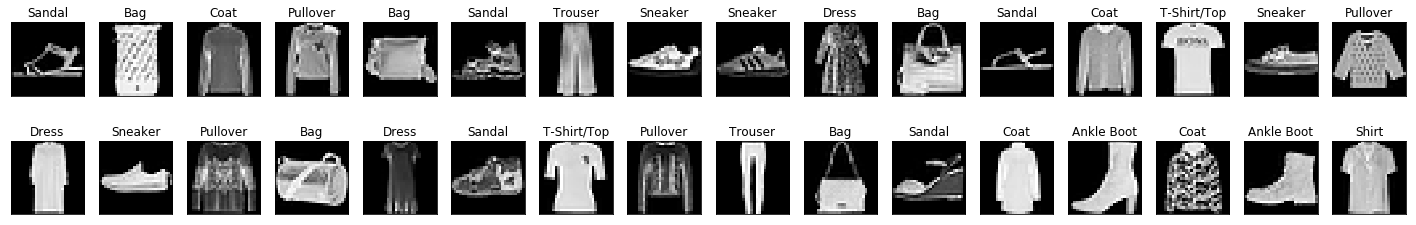

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(train_loader))
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap="gray")
    ax.set_title(classes[labels[idx]])

## View image in detail

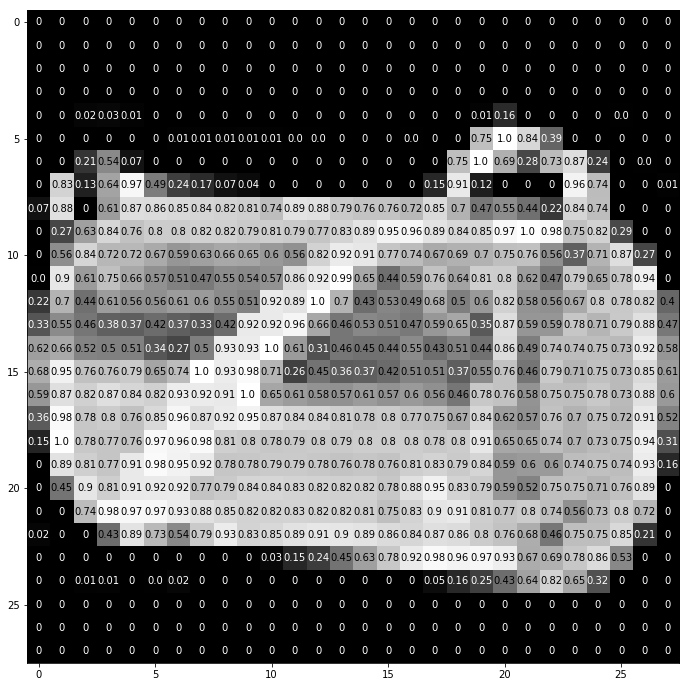

In [18]:
from random import randint

idx = randint(1, len(images))
img = np.squeeze(images[idx])
fig, ax1 = plt.subplots(1, 1, figsize=(12, 12))
ax1.imshow(img, cmap="gray")
width, height = img.shape
thresh = img.max()/2.5

for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax1.annotate(str(val), xy=(y, x), horizontalalignment="center",
                     verticalalignment="center", color="white" if img[x][y]<thresh else "black")